In [1]:
import numpy as np
from scipy import integrate
from scipy.integrate import simps
import matplotlib.pyplot as plt
import math
from scipy.optimize import fsolve

In [18]:
#section1
x1=np.arange(-5,6)
y1=np.arange(-10,1)
A1=abs(simps(y1,x1))
print('Area of section1 is:',A1)

B1=10
T1=10
Cm1=A1/(B1*T1)
BoT1=B1/T1
#print(Cm1)

#section2
x2=np.linspace(0,14.8)
y2=np.linspace(-10,0)
A2=abs(simps(y2,x2))
print('Area of section2 is:',A2)
B2=14.8
T2=10
Cm2=A2/(B2*T2)
BoT2=B2/T2
#print(Cm2,BoT2)

def BoT_Lewis(a,b):
    return 2*(1+a+b)/(1-a+b)
def Cm_Lewis(a,b):
    return (np.pi/2*(1-a**2-3*b**2))/(2*(1+a+b)*(1-a+b))
def error(a,b,Cm,BoT):
    Cm_error =Cm-Cm_Lewis(a,b)
    BoT_error=BoT-BoT_Lewis(a,b)
    return (Cm_error,BoT_error)

def f(x):
    return error(a=x[0],b=x[1],Cm=Cm1,BoT=BoT1)
def f2(x):
    return error(a=x[0],b=x[1],Cm=Cm2,BoT=BoT2)

#validation&scaling
def error_check(x):
    return error(a=x[0],b=x[1],Cm=0.9,BoT=4)
def B_Lewis(a,b):
    return 2*(1+a+b)
x0 = [0,0] 
a1,b1 = fsolve(f,x0)
a2,b2 = fsolve(f2,x0)
a3,b3= fsolve(error_check,x0)
s1=B1/B_Lewis(a1,b1)
s2=B2/B_Lewis(a2,b2)
print('a1:{0},b1:{1}'.format(a1,b1))
print('a2:{0},b2:{1}'.format(a2,b2))
print('a_check:{0},b_check:{1}'.format(a3,b3))
print('section1 scale=',s1)
print('section2 scale=',s2)

Area of section1 is: 50.0
Area of section2 is: 74.0
a1:-0.3882670972423619,b1:0.1648012917276638
a2:-0.17661244362194012,b2:0.1819448150083673
a_check:0.31161064476542744,b_check:-0.06516806568015958
section1 scale= 6.438866485865535
section2 scale= 7.360749748657606


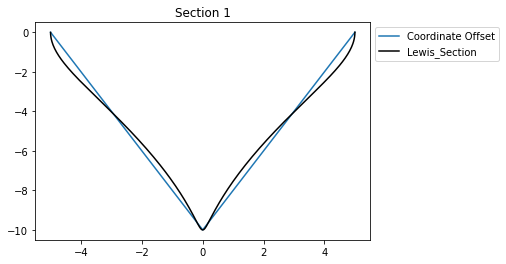

In [19]:
dtheta =0.01
theta=np.arange(0,np.pi,dtheta)
zeta=(1+a1)*np.cos(theta)+b1*np.cos(3*theta)-1j*((1-a1)*np.sin(theta)-b1*np.sin(3*theta))

#offset
x=np.arange(-5,5.5,0.5)
y1=np.linspace(0,-9,10)
y2=np.linspace(-10,0,11)
y=np.append(y1,y2)

plt.plot(x,y,label='Coordinate Offset')
plt.plot(s1*np.real(zeta),s1*np.imag(zeta),'k',label='Lewis_Section')
plt.title('Section 1')
plt.legend(loc=0, bbox_to_anchor=(1,1),ncol=1,fancybox=True)
plt.show()

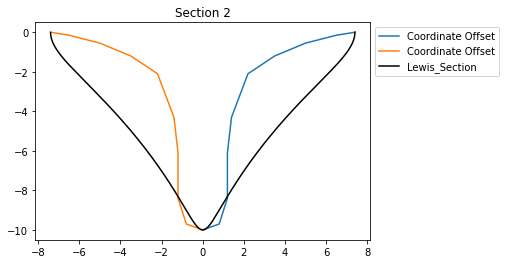

In [4]:
#valadation

x2=np.array([0,0.8,1.2,1.2,1.4,2.2,3.5,5,6.5,7.4])
y2=np.array([-10,-9.7,-8.4,-6.1,-4.3,-2.1,-1.2,-0.55,-0.15,0])

zeta2=(1+a2)*np.cos(theta)+b2*np.cos(3*theta)-1j*((1-a2)*np.sin(theta)-b2*np.sin(3*theta))

plt.plot(x2,y2,-x2,y2,label='Coordinate Offset')
plt.plot(s2*np.real(zeta2),s2*np.imag(zeta2),'k',label='Lewis_Section')
plt.title('Section 2')
plt.legend(loc=0, bbox_to_anchor=(1,1),ncol=1,fancybox=True)
plt.show()

In [5]:
#quantify the error
Lewis_A1=s1*s1*np.pi/2*(1-a1**2-3*b1**2)
Lewis_A2=s2*s2*np.pi/2*(1-a2**2-3*b2**2)
error_section1=(A1-Lewis_A1)/A1
error_section2=(A2-Lewis_A2)/A2
print('Lewis A1:',Lewis_A1,',geometry error is:{:.2%}'.format(error_section1))

print('Lewis A2:',Lewis_A2,',geometry error is:{:.2%}'.format(error_section2))

Lewis A1: 49.99999999997864 ,geometry error is:0.00%
Lewis A2: 74.0 ,geometry error is:0.00%


In [15]:
#added mass
def myy(a,b):
    return np.pi/2*rho*((1+a)**2+3*b**2)
rho=1025
def C22_Lewis(a,b,B):
    return 2*myy(a,b)/(rho*np.pi*B**2/8)

print('added mass for section1:',myy(a1,b1))
print('c22:',C22_Lewis(a1,b1,B1))
print('added mass for section2:',myy(a2,b2))
print('c22:',C22_Lewis(a2,b2,B2))


added mass for section1: 733.700004924527
c22: 0.036455643326528446
added mass for section2: 1251.4703753838023
c22: 0.02838856154578232
